In [ ]:
import pandas as pd

In [ ]:
!pip3 install matplotlib

In [ ]:
1!ls

Data.csv  output.csv  pres16results.csv  sample_data


In [ ]:
!pwd


/content


In [ ]:
df = pd.read_csv("/content/Data.csv", encoding= 'unicode_escape')

In [ ]:
df.to_csv("/content/Minwage.csv",encoding="utf-8")

In [ ]:
df = pd.read_csv("/content/Minwage.csv", encoding= 'unicode_escape')

In [ ]:
df.head(10)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
5,5,1968,Colorado,1.00 - 1.25(b),(b),1.25000,1.00000,34.783333,9.00,7.20
6,6,1968,Connecticut,1.40,NaN,1.40000,1.40000,34.783333,10.08,10.08
7,7,1968,Delaware,1.25,NaN,1.25000,1.25000,34.783333,9.00,9.00
8,8,1968,District of Columbia,1.25 - 1.40,NaN,1.40000,1.25000,34.783333,10.08,9.00
9,9,1968,Federal (FLSA),$1.15 & $1.60,NaN,1.60000,1.15000,34.783333,11.52,8.28


In [ ]:
gb=df.groupby("State")
gb.get_group("Alabama").set_index("Year").head(10)

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0
1973,275,Alabama,...,NaN,0.0,0.0,44.400000,0.0,0.0
1974,330,Alabama,...,NaN,0.0,0.0,49.308333,0.0,0.0
1975,385,Alabama,...,NaN,0.0,0.0,53.816667,0.0,0.0
1976,440,Alabama,...,NaN,0.0,0.0,56.908333,0.0,0.0


In [ ]:
df[df["High.Value"]==1].head(5)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
29,29,1968,Nebraska,1.00,NaN,1.0,1.0,34.783333,7.20,7.20
35,35,1968,North Carolina,1.00,NaN,1.0,1.0,34.783333,7.20,7.20
38,38,1968,Oklahoma,1.00,NaN,1.0,1.0,34.783333,7.20,7.20
52,52,1968,West Virginia,1.00,NaN,1.0,1.0,34.783333,7.20,7.20
84,84,1969,Nebraska,1.00,NaN,1.0,1.0,36.683333,6.83,6.83


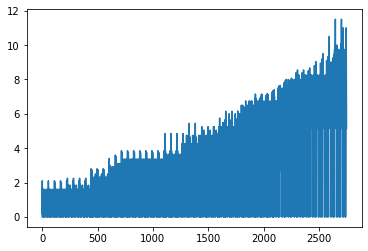

In [ ]:
df['High.Value'].plot()

In [ ]:
gb = df.groupby("State")

In [ ]:
gb

In [ ]:
gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [ ]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
  if act_min_wage.empty:
    act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
  else:
    act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
  
act_min_wage.head()
  

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,0.0,0.00,9.00,9.00,8.28,0.00,8.28,0.0,0.0,4.68,0.0,10.08,7.20,11.52,9.00,5.04,0.0,0.0,0.00,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,0.0,3.06,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,0.0,0.00,8.53,8.53,7.85,0.00,7.85,0.0,0.0,4.44,0.0,9.56,6.83,10.92,8.53,4.78,0.0,0.0,0.00,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,0.0,2.90,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,0.0,0.00,10.32,10.32,8.06,0.00,8.06,0.0,0.0,4.19,0.0,10.32,8.38,10.32,8.06,4.51,0.0,0.0,0.00,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,0.0,6.45,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,0.0,0.00,9.89,9.89,7.73,0.00,7.73,0.0,0.0,4.02,0.0,9.89,8.04,9.89,7.73,4.33,0.0,0.0,0.00,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,0.0,6.18,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,0.0,7.49,11.38,9.58,8.38,8.38,7.49,0.0,0.0,3.89,0.0,8.38,9.58,10.48,9.58,4.49,0.0,0.0,9.58,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,0.0,5.99,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [ ]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,1.980600,4.909800,8.076600,8.292800,6.93520,6.779200,6.301600,4.088800,3.674400,6.314400,0.0,8.191800,7.845600,8.762000,7.781400,6.656600,0.0,4.052000,5.863200,6.527800,7.583800,7.939000,8.116600,7.202200,8.298600,7.370200,6.995400,6.050400,5.48460,8.510600,7.844400,3.588400,8.323000,0.0,6.739600,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,3.561576,1.887927,1.229897,0.877401,1.00724,2.385091,1.275628,3.835916,2.466736,1.343869,0.0,0.938459,0.907239,1.121988,1.207345,1.244004,0.0,3.797229,2.251726,1.426518,0.866242,0.973408,0.882084,0.871331,1.361302,0.656855,0.870714,1.630708,2.39007,1.108701,0.852765,1.258745,0.981158,0.0,1.341918,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,0.000000,0.000000,6.220000,6.670000,4.41000,0.000000,3.830000,0.000000,0.000000,3.020000,0.0,6.510000,6.400000,6.890000,5.230000,3.490000,0.0,0.000000,0.000000,3.530000,6.060000,6.220000,6.420000,5.790000,6.180000,6.160000,4.650000,3.480000,2.04000,5.820000,6.400000,1.800000,6.390000,0.0,2.900000,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,0.000000,4.330000,7.110000,7.782500,6.42750,6.060000,5.200000,0.000000,3.082500,5.452500,0.0,7.512500,7.172500,7.932500,7.030000,6.115000,0.0,0.000000,4.707500,6.027500,6.995000,7.302500,7.512500,6.447500,7.172500,6.792500,6.412500,4.642500,2.58250,7.745000,7.302500,2.645000,7.715000,0.0,5.940000,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,0.000000,5.445000,7.795000,8.190000,7.07500,7.330000,6.285000,6.500000,3.735000,6.700000,0.0,8.065000,7.660000,8.705000,8.005000,6.895000,0.0,6.690000,5.950000,6.790000,7.465000,7.665000,8.070000,7.135000,8.195000,7.325000,7.175000,6.235000,6.80500,8.770000,7.705000,3.220000,8.230000,0.0,6.905000,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,0.000000,6.005000,8.802500,8.797500,7.71500,8.367500,7.490000,7.667500,4.562500,7.255000,0.0,8.585000,8.410000,9.385000,8.617500,7.550000,0.0,7.692500,7.432500,7.460000,8.007500,8.455000,8.675000,7.937500,9.352500,7.777500,7.655000,7.512500,7.33250,9.412500,8.327500,4.790000,8.912500,0.0,7.677500,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010

In [ ]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,-0.227059,-0.569150,0.787915,0.672620,0.371515,-0.504884,0.352950,-0.592920,-0.578159,-0.569134,NaN,0.784052,0.487056,0.726248,0.606292,-0.384472,NaN,-0.581392,-0.390705,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,NaN,-0.326316,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,0.896702,0.088429,0.051210,0.168391,0.448289,0.264556,0.654777,0.385053,0.444103,0.275070,NaN,0.145491,0.179236,0.464345,0.400150,-0.280747,NaN,0.427463,-0.082904,0.521086,0.180330,0.020688,0.302372,0.513394,0.327045,0.312699,0.216693,0.586746,-0.664922,0.471916,0.091265,0.653221,0.436086,NaN,0.317413,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.226320,0.473108,0.039593,0.204801,-0.006833,0.652497,-0.116454,0.278564,0.354641,0.427054,NaN,-0.059840,0.443650,-0.136325,0.113882,0.452996,NaN,0.294900,0.561894,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,NaN,0.800116,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.304550,-0.389749,0.492052,0.519241,0.623225,-0.241472,0.793831,-0.066494,-0.083699,-0.152946,NaN,0.716943,0.377899,0.942760,0.654850,-0.318507,NaN,-0.032252,-0.431631,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,NaN,-0.036787,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [ ]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [ ]:
issue_df = df[df["Low.2018"]==0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [ ]:
issue_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [ ]:
import numpy as np

In [ ]:
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,0.0,0.00,9.00,9.00,8.28,0.00,8.28,0.0,0.0,4.68,0.0,10.08,7.20,11.52,9.00,5.04,0.0,0.0,0.00,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,0.0,3.06,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,0.0,0.00,8.53,8.53,7.85,0.00,7.85,0.0,0.0,4.44,0.0,9.56,6.83,10.92,8.53,4.78,0.0,0.0,0.00,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,0.0,2.90,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,0.0,0.00,10.32,10.32,8.06,0.00,8.06,0.0,0.0,4.19,0.0,10.32,8.38,10.32,8.06,4.51,0.0,0.0,0.00,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,0.0,6.45,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,0.0,0.00,9.89,9.89,7.73,0.00,7.73,0.0,0.0,4.02,0.0,9.89,8.04,9.89,7.73,4.33,0.0,0.0,0.00,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,0.0,6.18,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,0.0,7.49,11.38,9.58,8.38,8.38,7.49,0.0,0.0,3.89,0.0,8.38,9.58,10.48,9.58,4.49,0.0,0.0,9.58,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,0.0,5.99,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [ ]:
act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()
#axis=1 is the column and axis =0 is the row

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,0.708405,0.675197,0.200148,0.173486,0.039299,0.537094,0.142551,-0.419871,0.752485,0.559386,0.084726,0.185884,0.205677,0.291382,0.353903,0.183239,0.060297,-0.417430,0.509889,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,0.671306,0.664098,0.237560,0.375888,0.346281,0.656305,0.379898,-0.194168,0.734443,0.522322,0.186286,0.403857,0.453302,0.403779,0.528760,0.364079,0.240203,-0.475629,0.622831,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,0.338621,0.133628,-0.255126,0.622760,0.880329,0.416165,0.737017,0.034715,-0.250411,0.759930,0.905728,0.640923,0.610602,0.640902,0.790967,0.348061,0.157740,0.428560,0.004197,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,0.410607,0.262175,-0.501651,0.575916,0.824104,0.557130,0.690024,-0.281617,-0.185862,0.786231,0.848651,0.656598,0.549588,0.790776,0.717387,0.059348,-0.035121,0.398503,-0.125297,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,0.368091,0.311292,-0.141714,0.716290,0.517447,0.604166,0.487391,-0.181494,0.199326,0.679905,0.541385,0.702774,0.633616,0.651270,0.651703,0.207330,0.084575,0.046429,0.271349,0.517041,0.097491,0.7

In [ ]:
min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()

In [ ]:
for problem in issue_df["State"].unique():
  if problem in min_wage_corr.columns:
    print("We are missing something here")

In [ ]:
gb = issue_df.groupby("State")
gb.get_group("Alabama")

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0
275,275,1973,Alabama,...,NaN,0.0,0.0,44.400000,0.0,0.0
330,330,1974,Alabama,...,NaN,0.0,0.0,49.308333,0.0,0.0
385,385,1975,Alabama,...,NaN,0.0,0.0,53.816667,0.0,0.0
440,440,1976,Alabama,...,NaN,0.0,0.0,56.908333,0.0,0.0
495,495,1977,Alabama,...,NaN,0.0,0.0,60.608333,0.0,0.0


In [ ]:
gb.get_group("Alabama")["Low.2018"].sum()

0.0

In [ ]:
gb.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
442,442,1976,Arizona,Â ...,NaN,0.0,0.0,56.908333,0.0,0.0
497,497,1977,Arizona,Â ...,NaN,0.0,0.0,60.608333,0.0,0.0
552,552,1978,Arizona,Â ...,NaN,0.0,0.0,65.233333,0.0,0.0
607,607,1979,Arizona,...,NaN,0.0,0.0,72.575000,0.0,0.0


In [ ]:
for state, data in gb:
  if data['Low.2018'].sum() !=0.0:
    print("We are missing something!",state)

In [ ]:
min_wage_corr

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,0.708405,0.675197,0.200148,0.173486,0.039299,0.537094,0.142551,-0.419871,0.752485,0.559386,0.084726,0.185884,0.205677,0.291382,0.353903,0.183239,0.060297,-0.417430,0.509889,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,0.671306,0.664098,0.237560,0.375888,0.346281,0.656305,0.379898,-0.194168,0.734443,0.522322,0.186286,0.403857,0.453302,0.403779,0.528760,0.364079,0.240203,-0.475629,0.622831,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,0.338621,0.133628,-0.255126,0.622760,0.880329,0.416165,0.737017,0.034715,-0.250411,0.759930,0.905728,0.640923,0.610602,0.640902,0.790967,0.348061,0.157740,0.428560,0.004197,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,0.410607,0.262175,-0.501651,0.575916,0.824104,0.557130,0.690024,-0.281617,-0.185862,0.786231,0.848651,0.656598,0.549588,0.790776,0.717387,0.059348,-0.035121,0.398503,-0.125297,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,0.368091,0.311292,-0.141714,0.716290,0.517447,0.604166,0.487391,-0.181494,0.199326,0.679905,0.541385,0.702774,0.633616,0.651270,0.651703,0.207330,0.084575,0.046429,0.271349,0.517041,0.097491,0.7

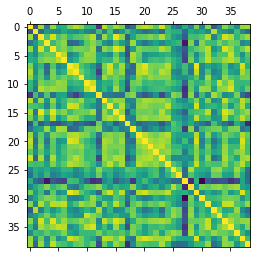

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)
plt.show()

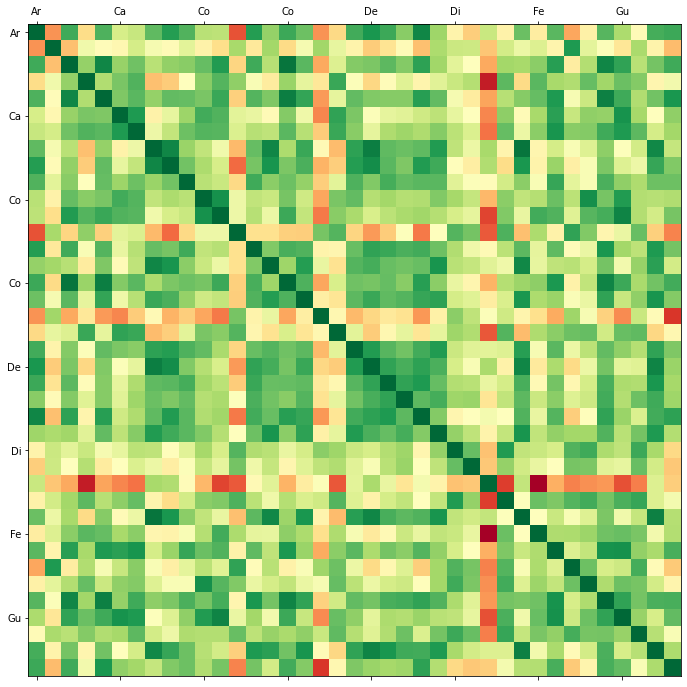

In [ ]:
labels  = [c[:2] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)


In [ ]:
labels

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Fe',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Pu',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [ ]:
dfs=pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

In [ ]:
!pip install lxml html5lib bs4

In [ ]:
dfs.head(5)

AttributeError: ignored

In [ ]:
pip install requests

In [ ]:
import requests
web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes", verify=False)
dfs = pd.read_html(web.text)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
dfs

[          State/District Abbreviation Postal Code
 0                Alabama         Ala.          AL
 1                 Alaska       Alaska          AK
 2                Arizona        Ariz.          AZ
 3               Arkansas         Ark.          AR
 4             California       Calif.          CA
 5               Colorado        Colo.          CO
 6            Connecticut        Conn.          CT
 7               Delaware         Del.          DE
 8   District of Columbia         D.C.          DC
 9                Florida         Fla.          FL
 10               Georgia          Ga.          GA
 11                Hawaii       Hawaii          HI
 12                 Idaho        Idaho          ID
 13              Illinois         Ill.          IL
 14               Indiana         Ind.          IN
 15                  Iowa         Iowa          IA
 16                Kansas        Kans.          KS
 17              Kentucky          Ky.          KY
 18             Louisiana      

In [ ]:
for df in dfs:
  print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [ ]:
state_abbv=dfs[0]
state_abbv.head()


,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [ ]:
!pwd

/content


In [ ]:
state_abbv.to_csv("/content/state_abbv.csv" ,index=False)

In [ ]:
state_abbv = pd.read_csv("/content/state_abbv.csv", index_col=0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


51

In [ ]:
state_abbv_dict = abbv_dict.to_dict()

In [ ]:
#to convert it to a dict with a double braces and if one braces then it turns intno a series
abbv_dict = state_abbv[["Postal Code"]].to_dict()

abbv_dict = state_abbv["Postal Code"]



In [ ]:
abbv_dict

State/District
Alabama                 AL
Alaska                  AK
Arizona                 AZ
Arkansas                AR
California              CA
Colorado                CO
Connecticut             CT
Delaware                DE
District of Columbia    DC
Florida                 FL
Georgia                 GA
Hawaii                  HI
Idaho                   ID
Illinois                IL
Indiana                 IN
Iowa                    IA
Kansas                  KS
Kentucky                KY
Louisiana               LA
Maine                   ME
Maryland                MD
Massachusetts           MA
Michigan                MI
Minnesota               MN
Mississippi             MS
Missouri                MO
Montana                 MT
Nebraska                NE
Nevada                  NV
New Hampshire           NH
New Jersey              NJ
New Mexico              NM
New York                NY
North Carolina          NC
North Dakota            ND
Ohio                    OH
Oklahoma     

In [ ]:
state_abbv_dict = abbv_dict.to_dict()
state_abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [ ]:
labels =[abbv_dict[c] for c in min_wage_corr.columns]

NameError: ignored

In [ ]:
abbv_dict['Federal (FLSA)']="FLSA"
abbv_dict['Guam']="GU"
abbv_dict['Puerto Rico']="PR"


labels =[abbv_dict[c] for c in min_wage_corr.columns]

In [ ]:
labels

['AK',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FLSA',
 'GU',
 'HI',
 'ID',
 'IN',
 'KY',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SD',
 'UT',
 'VT',
 'WA',
 'WV',
 'WI',
 'WY']

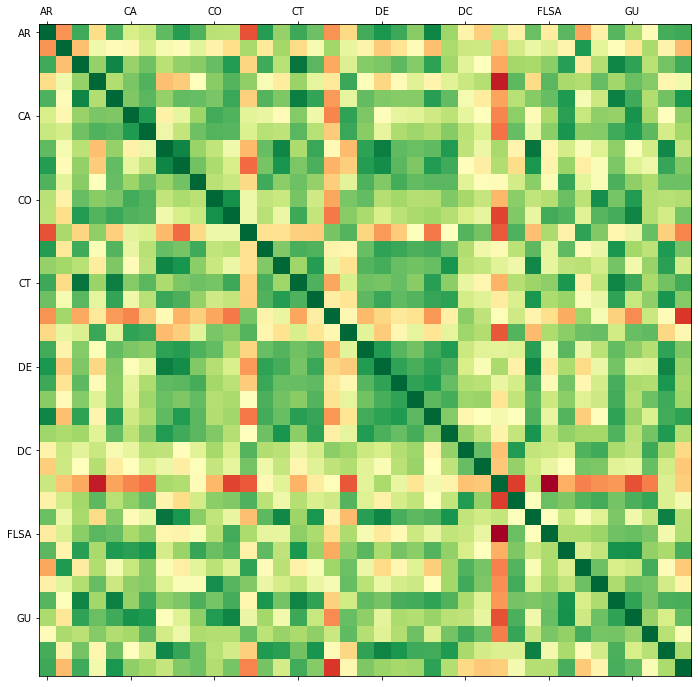

In [ ]:
labels =[abbv_dict[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

plt.show()

In [ ]:
 !ls
 

pres16results.csv  sample_data


In [ ]:
umemp_county = pd.read_csv("output.csv", encoding= 'unicode_escape')

In [ ]:
umemp_county 


,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3


In [ ]:
umemp_county .head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [ ]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
  if act_min_wage.empty:
    act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
  else:
    act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
  
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,0.0,0.00,9.00,9.00,8.28,0.00,8.28,0.0,0.0,4.68,0.0,10.08,7.20,11.52,9.00,5.04,0.0,0.0,0.00,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,0.0,3.06,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,0.0,0.00,8.53,8.53,7.85,0.00,7.85,0.0,0.0,4.44,0.0,9.56,6.83,10.92,8.53,4.78,0.0,0.0,0.00,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,0.0,2.90,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,0.0,0.00,10.32,10.32,8.06,0.00,8.06,0.0,0.0,4.19,0.0,10.32,8.38,10.32,8.06,4.51,0.0,0.0,0.00,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,0.0,6.45,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,0.0,0.00,9.89,9.89,7.73,0.00,7.73,0.0,0.0,4.02,0.0,9.89,8.04,9.89,7.73,4.33,0.0,0.0,0.00,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,0.0,6.18,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,0.0,7.49,11.38,9.58,8.38,8.38,7.49,0.0,0.0,3.89,0.0,8.38,9.58,10.48,9.58,4.49,0.0,0.0,9.58,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,0.0,5.99,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [ ]:
import numpy as np

In [ ]:
act_min_wage = act_min_wage.replace(0,np.NaN).dropna(axis=1)
act_min_wage.head(5)

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,8.28,8.28,4.68,10.08,7.20,11.52,9.00,5.04,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,7.85,7.85,4.44,9.56,6.83,10.92,8.53,4.78,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,8.06,8.06,4.19,10.32,8.38,10.32,8.06,4.51,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,7.73,7.73,4.02,9.89,8.04,9.89,7.73,4.33,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,8.38,7.49,3.89,8.38,9.58,10.48,9.58,4.49,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


In [ ]:
#access by row in that row which column you want to access
act_min_wage.loc[1970]['Washington']

10.32

In [ ]:
def get_min_wage(year,state):
  try:
    return act_min_wage.loc[year][state]
  except:
    return np.NaN

get_min_wage(2012,"Colorado")

8.33

In [ ]:
try:
  a = 0
  b = 1
  x = b/a
  c = 35
except:
  print('error happened')

print('last statement executed')


error happened
last statement executed


In [ ]:
%%time

umemp_county['min_wage']=list(map(get_min_wage, umemp_county['Year'], umemp_county["State"]))

CPU times: user 2min, sys: 64.7 ms, total: 2min 1s
Wall time: 2min 1s


In [ ]:
umemp_county.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [ ]:
#using map function for transformation
def multiply_by_2(a):
  return 3*a

x = [1,2,3,4,5]

list(map(multiply_by_2, x))


[3, 6, 9, 12, 15]

In [ ]:
umemp_county[["Rate", "min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.153047
min_wage,0.153047,1.000000


In [ ]:
umemp_county[["Rate", "min_wage"]].cov()

,Rate,min_wage
Rate,9.687873,0.651586
min_wage,0.651586,1.874228


In [ ]:
pres16=pd.read_csv("pres16results.csv")

In [ ]:
pres16.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [ ]:
len(umemp_county)

885548

In [ ]:
umemp_county.loc[2015]

Year                2015
Month           February
State               Ohio
County      Logan County
Rate                 4.8
min_wage            7.66
Name: 2015, dtype: object

In [ ]:
county_2015=umemp_county[(umemp_county['Year']==2015) & (umemp_county['Month']=="February")]

In [ ]:
county_2015

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN
...,...,...,...,...,...,...
2797,2015,February,Maine,Somerset County,8.4,7.92
2798,2015,February,Maine,Oxford County,6.8,7.92
2799,2015,February,Maine,Knox County,6.1,7.92
2800,2015,February,Maine,Piscataquis County,7.0,7.92


In [ ]:
abbv_dict

State/District
Alabama                 AL
Alaska                  AK
Arizona                 AZ
Arkansas                AR
California              CA
Colorado                CO
Connecticut             CT
Delaware                DE
District of Columbia    DC
Florida                 FL
Georgia                 GA
Hawaii                  HI
Idaho                   ID
Illinois                IL
Indiana                 IN
Iowa                    IA
Kansas                  KS
Kentucky                KY
Louisiana               LA
Maine                   ME
Maryland                MD
Massachusetts           MA
Michigan                MI
Minnesota               MN
Mississippi             MS
Missouri                MO
Montana                 MT
Nebraska                NE
Nevada                  NV
New Hampshire           NH
New Jersey              NJ
New Mexico              NM
New York                NY
North Carolina          NC
North Dakota            ND
Ohio                    OH
Oklahoma     

In [ ]:
county_2015["State"]=county_2015["State"].map(state_abbv_dict)

In [ ]:
county_2015.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


In [ ]:
county_2015=umemp_county.copy()[(umemp_county['Year']==2015) & (umemp_county['Month']=="February")]

In [ ]:
len(county_2015)

2802

In [ ]:
len(pres16)

18475

In [ ]:
pres16.rename(columns={"county":"County","st":"State"}, inplace= True)
pres16.head()

fips             cand  ...       pct          lead
County State                        ...                        
NaN    US      US     Donald Trump  ...  0.472993  Donald Trump
       US      US  Hillary Clinton  ...  0.477938  Donald Trump
       US      US     Gary Johnson  ...  0.032640  Donald Trump
       US      US       Jill Stein  ...  0.009844  Donald Trump
       US      US    Evan McMullin  ...  0.003540  Donald Trump

[5 rows x 7 columns]

In [ ]:
for df in [county_2015, pres16]:
  df.set_index(["County","State"], inplace= True)

pres16.head()

KeyError: ignored

In [ ]:
[county_2015, pres16]

[                          Year     Month  Rate  min_wage
 County             State                                
 Newton County      MS     2015  February   6.1       NaN
 Panola County      MS     2015  February   9.4       NaN
 Monroe County      MS     2015  February   7.9       NaN
 Hinds County       MS     2015  February   6.1       NaN
 Kemper County      MS     2015  February  10.6       NaN
 ...                        ...       ...   ...       ...
 Somerset County    ME     2015  February   8.4      7.92
 Oxford County      ME     2015  February   6.8      7.92
 Knox County        ME     2015  February   6.1      7.92
 Piscataquis County ME     2015  February   7.0      7.92
 Aroostook County   ME     2015  February   7.2      7.92
 
 [2802 rows x 4 columns],
                           fips             cand  ...       pct          lead
 County            State                          ...                        
 NaN               US        US     Donald Trump  ...  0.47299

In [ ]:
county_2015

,,Year,Month,Rate,min_wage
County,State,,,,
Newton County,MS,2015,February,6.1,NaN
Panola County,MS,2015,February,9.4,NaN
Monroe County,MS,2015,February,7.9,NaN
Hinds County,MS,2015,February,6.1,NaN
Kemper County,MS,2015,February,10.6,NaN
...,...,...,...,...,...
Somerset County,ME,2015,February,8.4,7.92
Oxford County,ME,2015,February,6.8,7.92
Knox County,ME,2015,February,6.1,7.92


In [ ]:
pres16

fips             cand  ...       pct          lead
County            State                          ...                        
NaN               US        US     Donald Trump  ...  0.472993  Donald Trump
                  US        US  Hillary Clinton  ...  0.477938  Donald Trump
                  US        US     Gary Johnson  ...  0.032640  Donald Trump
                  US        US       Jill Stein  ...  0.009844  Donald Trump
                  US        US    Evan McMullin  ...  0.003540  Donald Trump
...                        ...              ...  ...       ...           ...
Yauco Municipio   NaN    72153              NaN  ...       NaN           NaN
Midway Islands    NaN    74300              NaN  ...       NaN           NaN
St. Croix Island  NaN    78010              NaN  ...       NaN           NaN
St. John Island   NaN    78020              NaN  ...       NaN           NaN
St. Thomas Island NaN    78030              NaN  ...       NaN           NaN

[18475 rows x 7 columns]

In [ ]:
pres16=pres16[pres16["cand"]=="Donald Trump"]
pres16= pres16[["pct"]]
pres16.dropna(inplace=True)
pres16.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [ ]:
all_together=county_2015.merge(pres16, on=["County", "State"])
all_together.dropna(inplace=True)
all_together.head()

,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Major County,OK,2015,February,2.6,2.11,0.864960
Pottawatomie County,OK,2015,February,4.5,2.11,0.701342
Johnston County,OK,2015,February,6.5,2.11,0.770057
Jefferson County,OK,2015,February,5.0,2.11,0.812367
Beaver County,OK,2015,February,2.8,2.11,0.888243


In [ ]:
all_together.drop("Year", axis=1, inplace=True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.11,0.864960
Pottawatomie County,OK,February,4.5,2.11,0.701342
Johnston County,OK,February,6.5,2.11,0.770057
Jefferson County,OK,February,5.0,2.11,0.812367
Beaver County,OK,February,2.8,2.11,0.888243


In [ ]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186689,-0.085985
min_wage,0.186689,1.000000,-0.325036
pct,-0.085985,-0.325036,1.000000


In [ ]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.683870,-0.031771
min_wage,0.683870,2.336451,-0.076602
pct,-0.031771,-0.076602,0.023772


In [ ]:
!ls


sample_data


In [ ]:
!pwd

/content


In [ ]:
df=pd.read_csv("diamonds.csv", index_col=0)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
len(df)

53940

In [ ]:
cut_class_dict=df["cut"].unique()

In [ ]:
#converting to type categorial data to numerical data (classes into code)
df["cut"].astype("category").cat.codes

1        2
2        3
3        1
4        3
5        1
        ..
53936    2
53937    1
53938    4
53939    3
53940    2
Length: 53940, dtype: int8

In [ ]:
cut_class_dict

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
cut_variable

{'Fair': 5, 'Good': 3, 'Ideal': 1, 'Premium': 2, 'Very Good': 4}

In [ ]:
clarity_dict=df["clarity"].unique()
clarity_dict

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
clarity_dict={clarity_dict[x-1]:x for x in range(1,len(clarity_dict)+1)}

In [ ]:
color_dict=df["color"].unique()
color_dict

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
color_dict={color_dict[x-1]:x for x in range(1,len(color_dict)+1)}

In [ ]:
cut_dict = {}

for x, item in enumerate(cut_variable):
  print(x,item)
  cut_dict[item] = x

print(cut_dict)   

0 Ideal
1 Premium
2 Good
3 Very Good
4 Fair
{'Ideal': 0, 'Premium': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4}


In [ ]:
cut_class_dict={cut_class_dict[x-1]:x for x in range(1,len(cut_class_dict)+1)}

In [ ]:
cut_class_dict = {'Ideal':5, 'Premium': 4, 'Good':2, 'Very Good':3, 'Fair': 1}

In [ ]:
cut_class_dict


{'Fair': 5, 'Good': 3, 'Ideal': 1, 'Premium': 2, 'Very Good': 4}

In [ ]:
clarity_dict

{'I1': 7,
 'IF': 8,
 'SI1': 2,
 'SI2': 1,
 'VS1': 3,
 'VS2': 4,
 'VVS1': 6,
 'VVS2': 5}

In [ ]:
color_dict

{'D': 7, 'E': 1, 'F': 5, 'G': 6, 'H': 4, 'I': 2, 'J': 3}

In [ ]:
df["cut"]=df["cut"].map(cut_class_dict)
df["clarity"]=df["clarity"].map(clarity_dict)
df["color"]=df["color"].map(color_dict)

In [ ]:
cut_class_dict

{'Fair': 5, 'Good': 3, 'Ideal': 1, 'Premium': 2, 'Very Good': 4}

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
4,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.values

array([[0.23, 1.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 2.  , 1.  , ..., 3.89, 3.84, 2.31],
       [0.23, 3.  , 1.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.7 , 4.  , 7.  , ..., 5.66, 5.68, 3.56],
       [0.86, 2.  , 4.  , ..., 6.15, 6.12, 3.74],
       [0.75, 1.  , 7.  , ..., 5.83, 5.87, 3.64]])

In [ ]:
import sklearn 
from sklearn import svm, preprocessing

In [ ]:
df=sklearn.utils.shuffle(df)

x=df.drop("price", axis=1).values
x=preprocessing.scale(x)
y=df["price"].values

In [ ]:
x

array([[0.72, 1.  , 1.  , ..., 5.73, 5.76, 3.57],
       [0.42, 2.  , 5.  , ..., 4.84, 4.81, 2.98],
       [0.92, 4.  , 5.  , ..., 6.26, 6.29, 3.76],
       ...,
       [0.29, 1.  , 5.  , ..., 4.26, 4.29, 2.61],
       [1.52, 2.  , 2.  , ..., 7.47, 7.41, 4.45],
       [1.22, 2.  , 2.  , ..., 6.84, 6.79, 4.29]])

In [ ]:
y

array([3235,  992, 3625, ...,  715, 8010, 5165])

In [ ]:
test_size=200

x_train=x[:-test_size]
y_train=y[:-test_size]

x_test=x[-test_size:]
y_test=y[-test_size:]


clf=svm.SVR(kernel="linear")
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.score(x_test, y_test)

0.8686953617345996

In [ ]:
names = ['a', 'b', 'c', 'd', 'e']
scores = [10, 20, 30, 30, 10]

score_name_dict = {}

for name, score in zip(names, scores): 
  score_name_dict[name] = score


print(score_name_dict)


{'a': 10, 'b': 20, 'c': 30, 'd': 30, 'e': 10}


In [ ]:
for x , y in list(zip(x_test, y_test)):
  print(f"Model: {clf.predict([x])[0]}, Actual:{y}")

Model: [949.96863157], Actual:975
Model: [12141.44136371], Actual:15291
Model: [78.60004953], Actual:450
Model: [1283.20527276], Actual:1381
Model: [2124.7279522], Actual:1884
Model: [1920.09266778], Actual:1273
Model: [227.4410159], Actual:457
Model: [3138.30339483], Actual:3421
Model: [494.84904557], Actual:787
Model: [1253.85451199], Actual:1088
Model: [-28.59135694], Actual:447
Model: [162.26537833], Actual:571
Model: [10026.76750684], Actual:11605
Model: [3095.67425941], Actual:2599
Model: [5353.22499677], Actual:5662
Model: [5613.18844396], Actual:4641
Model: [9442.53190514], Actual:12542
Model: [10432.81003349], Actual:5998
Model: [4987.62304925], Actual:7785
Model: [3272.65920932], Actual:2644
Model: [899.39665554], Actual:970
Model: [1216.93161737], Actual:871
Model: [549.22554743], Actual:882
Model: [87.2509715], Actual:540
Model: [5100.56848822], Actual:5704
Model: [398.55047264], Actual:561
Model: [7558.13207899], Actual:6139
Model: [734.38517407], Actual:803
Model: [5402.8

In [ ]:
clf=svm.SVR(kernel="rbf")
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.score(x_test, y_test)

0.5703954327078267

In [ ]:
for x , y in list(zip(x_test, y_test)):
  print(f"Model: {clf.predict([x])[0]}, Actual:{y}")

In [ ]:
!git clone https://github.com/KeithGalli/pandas.git

Cloning into 'pandas'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [ ]:
!pwd

/content


In [ ]:
poke= pd.read_csv("/content/pandas/pokemon_data.csv")

In [ ]:
poke.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
for index, row in df.iterrows():
  print(index, row["Name"])

0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise
12 BlastoiseMega Blastoise
13 Caterpie
14 Metapod
15 Butterfree
16 Weedle
17 Kakuna
18 Beedrill
19 BeedrillMega Beedrill
20 Pidgey
21 Pidgeotto
22 Pidgeot
23 PidgeotMega Pidgeot
24 Rattata
25 Raticate
26 Spearow
27 Fearow
28 Ekans
29 Arbok
30 Pikachu
31 Raichu
32 Sandshrew
33 Sandslash
34 Nidoran (Female)
35 Nidorina
36 Nidoqueen
37 Nidoran (Male)
38 Nidorino
39 Nidoking
40 Clefairy
41 Clefable
42 Vulpix
43 Ninetales
44 Jigglypuff
45 Wigglytuff
46 Zubat
47 Golbat
48 Oddish
49 Gloom
50 Vileplume
51 Paras
52 Parasect
53 Venonat
54 Venomoth
55 Diglett
56 Dugtrio
57 Meowth
58 Persian
59 Psyduck
60 Golduck
61 Mankey
62 Primeape
63 Growlithe
64 Arcanine
65 Poliwag
66 Poliwhirl
67 Poliwrath
68 Abra
69 Kadabra
70 Alakazam
71 AlakazamMega Alakazam
72 Machop
73 Machoke
74 Machamp
75 Bellsprout
76 Weepinbell
77 

In [ ]:
df.loc[df["Type 1"]=="Fire"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False


In [ ]:
df.sort_values("Name", ascending= False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
695,634,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False
46,41,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
631,570,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
632,571,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False
392,359,Absol,Dark,NaN,65,130,60,75,60,75,3,False
68,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False


In [ ]:
df["Total"]=df.iloc[:,4:10].sum(axis=1)

In [ ]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,545
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,550
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,590
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,530
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,600


In [ ]:
df=df.drop(columns=["Total"])

In [ ]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
cols=list(df.columns.values)
df=df[cols[0:4] + [cols[-1]] +cols[4:12]]

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Legendary', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
df[['#', 'Name', 'HP','Type 1', 'Type 2', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

,#,Name,HP,Type 1,Type 2,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,45,Grass,Poison,49,49,65,65,45,1
1,2,Ivysaur,60,Grass,Poison,62,63,80,80,60,1
2,3,Venusaur,80,Grass,Poison,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,80,Grass,Poison,100,123,122,120,80,1
4,4,Charmander,39,Fire,NaN,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,50,Rock,Fairy,100,150,100,150,50,6
796,719,DiancieMega Diancie,50,Rock,Fairy,160,110,160,110,110,6
797,720,HoopaHoopa Confined,80,Psychic,Ghost,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,80,Psychic,Dark,160,60,170,130,80,6


In [ ]:
del df['Legendary']

In [ ]:
new_df = new_df.reset_index()

In [ ]:
#df.loc[df["Name"].str.contains("Mega")]
df.loc[~df["Name"].str.contains("Mega")]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1
...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6


In [ ]:
import re
#based of textual patterns

In [ ]:
#df.loc[df["Name"].str.contains("mega|grass", regex=True, flags=re.I)]
df.loc[df["Name"].str.contains("^pi[a-z]*", regex=True, flags=re.I)]
# ^ (starts with the letter)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1
30,25,Pikachu,Electric,NaN,35,55,40,50,50,90,1
136,127,Pinsir,Bug,NaN,65,125,100,55,70,85,1
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1
186,172,Pichu,Electric,NaN,20,40,15,35,35,60,2
219,204,Pineco,Bug,NaN,50,65,90,35,35,15,2
239,221,Piloswine,Ice,Ground,100,100,80,60,60,50,2


In [ ]:
df.loc[df["Type 1"] == "Fire" ,"Type 1"] = "Flamer"
df
#replace all the word of fire with Flamer in rows 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,4,Charmander,Flamer,NaN,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6


In [ ]:
df.loc[df["Type 1"] == "Fire" ,"Legendary"] = True

In [ ]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,NaN
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,NaN
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,NaN
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,NaN
4,4,Charmander,Flamer,NaN,39,52,43,60,50,65,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,NaN
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,NaN
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,NaN
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,NaN


In [ ]:
[2*x for x in range(5)]

[0, 2, 4, 6, 8]

In [ ]:
names = ['a', 'b', 'c', 'd', 'e']
c = "Mr ."
new_name = []
for name in names:
  b = c + name
  new_name.append(b)
print(new_name)  

['Mr .a', 'Mr .b', 'Mr .c', 'Mr .d', 'Mr .e']


In [ ]:
['Mr. ' + x for x in names]

['Mr. a', 'Mr. b', 'Mr. c', 'Mr. d', 'Mr. e']

In [ ]:
df.groupby(["Type 1"]).mean().sort_values("Attack", ascending=False)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Type 1,,,,,,,,
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000
Fighting,363.851852,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370
Ground,356.281250,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250
Rock,392.727273,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545
Steel,442.851852,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258
Flamer,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000
Poison,251.785714,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714


In [ ]:
for idx, pokemon in enumerate(pd.read_csv("diamonds.csv", chunksize=20)):
  print("Chunk DF: " + str(idx) + " number\n")
  print("Something ")

Streaming output truncated to the last 5000 lines.
Something 
Chunk DF: 4385 number

Something 
Chunk DF: 4386 number

Something 
Chunk DF: 4387 number

Something 
Chunk DF: 4388 number

Something 
Chunk DF: 4389 number

Something 
Chunk DF: 4390 number

Something 
Chunk DF: 4391 number

Something 
Chunk DF: 4392 number

Something 
Chunk DF: 4393 number

Something 
Chunk DF: 4394 number

Something 
Chunk DF: 4395 number

Something 
Chunk DF: 4396 number

Something 
Chunk DF: 4397 number

Something 
Chunk DF: 4398 number

Something 
Chunk DF: 4399 number

Something 
Chunk DF: 4400 number

Something 
Chunk DF: 4401 number

Something 
Chunk DF: 4402 number

Something 
Chunk DF: 4403 number

Something 
Chunk DF: 4404 number

Something 
Chunk DF: 4405 number

Something 
Chunk DF: 4406 number

Something 
Chunk DF: 4407 number

Something 
Chunk DF: 4408 number

Something 
Chunk DF: 4409 number

Something 
Chunk DF: 4410 number

Something 
Chunk DF: 4411 number

Something 
Chunk DF: 4412 numbe

KeyboardInterrupt: ignored